In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv('data/homepage-experiment-data.csv')
data.head(10)

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3
5,6,1681,287,3,1780,299,3
6,7,1534,262,5,1555,276,8
7,8,1798,331,12,1787,326,20
8,9,1478,223,30,1553,298,38
9,10,1461,236,32,1458,289,23


### Downloads Rate

In [13]:
data['cdr'] = \
    data['Control Downloads'] / data['Control Cookies'] 

data['edr'] = \
    data['Experiment Downloads'] / data['Experiment Cookies']

In [14]:
# Compute download rate for control records
control_ctr = data['cdr'].mean()

control_ctr

0.16110817914523748

In [15]:
# Compute download rate for experiment records
experiment_ctr = data['edr'].mean()

experiment_ctr

0.18069306246883612

In [16]:
# Compute observed difference in download rates
obs_diff = experiment_ctr - control_ctr

obs_diff

0.019584883323598645

In [17]:
# Create sampling distribution for difference in download rates
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = data.sample(n=data.shape[0], replace=True) # bootstrap
    control_mean = b_samp['cdr'].mean()
    experiment_mean = b_samp['edr'].mean()
    diffs.append(experiment_mean - control_mean)

(array([6.000e+00, 7.100e+01, 4.940e+02, 1.668e+03, 3.047e+03, 2.910e+03,
        1.398e+03, 3.600e+02, 4.400e+01, 2.000e+00]),
 array([0.00930766, 0.01140305, 0.01349844, 0.01559384, 0.01768923,
        0.01978463, 0.02188002, 0.02397541, 0.02607081, 0.0281662 ,
        0.03026159]),
 <a list of 10 Patch objects>)

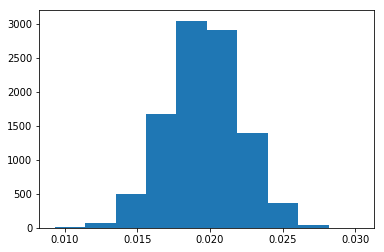

In [18]:
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

In [19]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

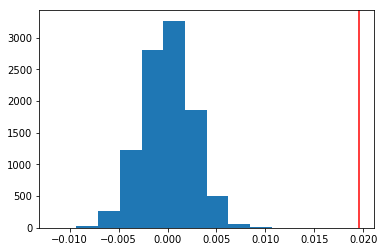

In [20]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [21]:
# compute p value
(null_vals > obs_diff).mean()

0.0

### Licenses Rate

In [22]:
clr = \
    data[data['Day']>7]['Control Licenses'].values \
    / data[data['Day']>7]['Control Cookies'].values 

elr = \
    data[data['Day']>7]['Experiment Licenses'].values \
    / data[data['Day']>7]['Experiment Cookies'].values

data2 = pd.DataFrame(data={'clr': clr, 'elr': elr})

data2

,clr,elr
0,0.006674,0.011192
1,0.020298,0.024469
2,0.021903,0.015775
3,0.023681,0.023151
4,0.015043,0.021698
5,0.017647,0.017847
6,0.020983,0.019148
7,0.018112,0.018028
8,0.021189,0.018057
9,0.020343,0.023211


In [25]:
# Compute purchase rate for control records
control_ctr2 = data2['clr'].mean()

control_ctr2

0.01959896414024526

In [26]:
# Compute purchase rate for experiment records
experiment_ctr2 = data2['elr'].mean()

experiment_ctr2

0.019907537461870253

In [27]:
# Compute observed difference in purchase rates
obs_diff2 = experiment_ctr2 - control_ctr2

obs_diff2

0.0003085733216249935

In [28]:
# Create sampling distribution for difference in purchase rates
# with boostrapping
diffs2 = []
for _ in range(10000):
    b_samp = data2.sample(n=data2.shape[0], replace=True) # bootstrap
    control_mean = b_samp['clr'].mean()
    experiment_mean = b_samp['elr'].mean()
    diffs2.append(experiment_mean - control_mean)

(array([  25.,  128.,  542., 1538., 2596., 2687., 1716.,  631.,  116.,
          21.]),
 array([-0.0029213 , -0.00227978, -0.00163826, -0.00099674, -0.00035522,
         0.0002863 ,  0.00092782,  0.00156934,  0.00221087,  0.00285239,
         0.00349391]),
 <a list of 10 Patch objects>)

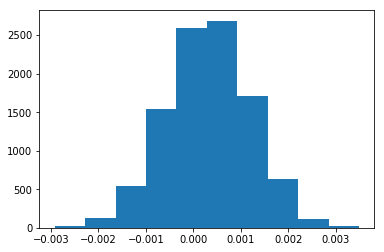

In [29]:
diffs2 = np.array(diffs2)

# Plot sampling distribution
plt.hist(diffs2)

In [30]:
null_vals2 = np.random.normal(0, diffs2.std(), diffs2.size)

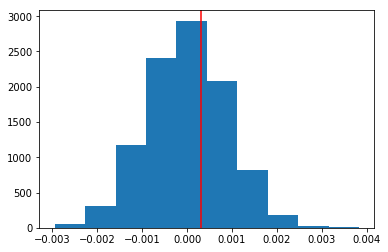

In [31]:
# plot null distribution
plt.hist(null_vals2);

# plot line for observed statistic
plt.axvline(obs_diff2, c='red');

In [32]:
# compute p value
(null_vals2 > obs_diff2).mean()

0.3685